In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os

C:\Users\Afandi Soufiane\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


#### CNN libraries

In [3]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

#### Image Preprocessing libraries

In [4]:
from PIL import Image
import cv2

# --- Préparation de l'image

In [5]:
project_path = "D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP 4 -\Traffic_Signs_WebApp-master"

In [6]:
def preparation_image(project_path, classes_number):
    data   = []
    labels = []

    for i in range(classes_number):
        path_to_specific_image_class_train = os.path.join(project_path, 'Train', str(i))
        images = os.listdir(path_to_specific_image_class_train)
        
        for img in images:
            try:
                image = Image.open(path_to_specific_image_class_train + '\\'+ img)
                image = np.array(image.resize((30,30)))
                data.append(image)
                labels.append(i)
            except Exception as e:
                print("Exception lors du prétraitement de l'image", e)
    
    return (data, labels)

In [8]:
# our dataset contains 43 Classes
classes = 43

data, labels = preparation_image("D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master", 
                 classes)

In [9]:
len(data)

39209

In [10]:
len(labels)

39209

In [15]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [46]:
# Save Labels & Data for future use
# np.save('./training/data',data)
# np.save('./training/target',labels)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [19]:
y_train

array([ 5,  4, 35, ..., 26, 13,  2])

In [20]:
y_train = to_categorical(y_train, 43)
print(y_train.shape)
y_test = to_categorical(y_test, 43)
print(y_test.shape)

(31367, 43)
(7842, 43)


In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [51]:
classes

43

In [23]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 119s 120ms/step - loss: 1.9682 - accuracy: 0.5033 - val_loss: 0.5676 - val_accuracy: 0.8535
Epoch 2/20
981/981 [==============================] - 108s 110ms/step - loss: 0.7180 - accuracy: 0.7863 - val_loss: 0.2615 - val_accuracy: 0.9295
Epoch 3/20
981/981 [==============================] - 108s 111ms/step - loss: 0.4801 - accuracy: 0.8570 - val_loss: 0.2215 - val_accuracy: 0.9302
Epoch 4/20
981/981 [==============================] - 126s 128ms/step - loss: 0.3701 - accuracy: 0.8910 - val_loss: 0.1486 - val_accuracy: 0.9594
Epoch 5/20
981/981 [==============================] - 116s 118ms/step - loss: 0.3267 - accuracy: 0.9051 - val_loss: 0.1037 - val_accuracy: 0.9733
Epoch 6/20
981/981 [==============================] - 120s 122ms/step - loss: 0.3155 - accuracy: 0.9090 - val_loss: 0.1009 - val_accuracy: 0.9718
Epoch 7/20
981/981 [==============================] - 117s 119ms/step - loss: 0.3011 - accuracy: 0.9157 - val_loss: 0.1130 -

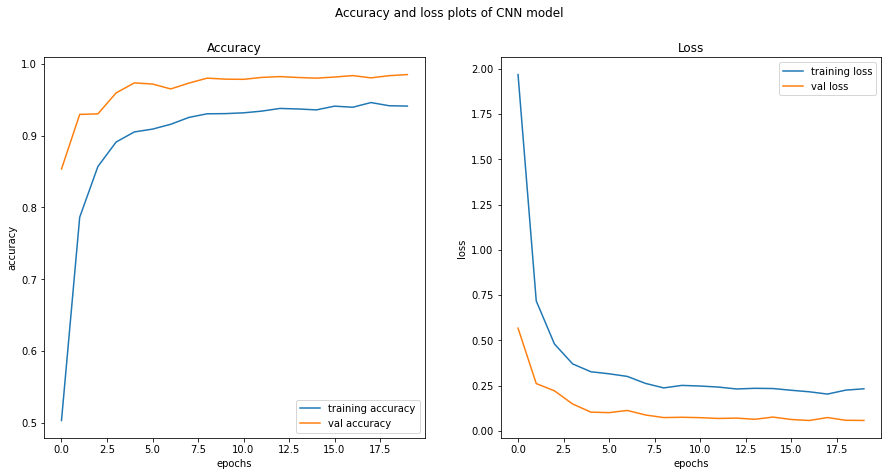

In [26]:
plt.figure(figsize=(15, 7))

plt.suptitle('Accuracy and loss plots of CNN model')


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


plt.show()

In [27]:
test_data_csv = pd.read_csv('Test.csv')

In [28]:
test_data_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [29]:
labels = test_data_csv["ClassId"].values
images_path = test_data_csv["Path"].values

In [30]:
data=[]

In [31]:
for path in images_path:
    image = Image.open(path)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test= np.array(data)

In [33]:
Y_pred = model.predict(X_test)

In [34]:
Y_pred.shape

(12630, 43)

In [36]:
Y_pred[0]

array([2.8161391e-36, 7.1991333e-23, 1.8147893e-24, 4.6232181e-20,
       3.2061769e-26, 1.7247513e-21, 1.2664974e-31, 2.0313509e-17,
       1.9527895e-21, 5.2040715e-14, 1.0220880e-21, 1.8100226e-20,
       1.1639209e-15, 1.8365253e-31, 9.3984932e-33, 4.5773487e-19,
       1.0000000e+00, 3.5110375e-25, 7.1746712e-25, 4.8123976e-34,
       2.7254519e-26, 3.0120403e-33, 0.0000000e+00, 1.1333412e-33,
       5.8068971e-34, 1.5332489e-34, 1.5066137e-26, 1.4866573e-30,
       2.1681349e-25, 1.6408496e-27, 6.3404093e-29, 0.0000000e+00,
       1.7282033e-20, 2.1427271e-26, 1.1402548e-31, 7.9432506e-23,
       1.1516631e-33, 1.2148792e-38, 3.8769898e-33, 0.0000000e+00,
       3.2951661e-20, 1.2774425e-18, 3.7470893e-24], dtype=float32)

In [38]:
np.argmax(Y_pred[0])

16

In [39]:
Y_pred = np.argmax(Y_pred,axis=1)

In [40]:
Y_pred

array([16,  1, 38, ..., 15,  7, 10], dtype=int64)

## Accuracy : Test Data

In [41]:
Y_pred.shape

(12630,)

In [42]:
# class_id = to_categorical(class_id, 43)
labels.shape

(12630,)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, Y_pred))

0.9487727632620744


In [47]:
# model.save("./training/TSR.h5")

# Deploy Model

In [11]:
from tensorflow import keras
model = keras.models.load_model(r'training\TSR.h5')

In [12]:
model.summarymary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [5]:
# Classes of trafic signs

classes_labeled = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = model.predict(X_test)
    Y_pred = np.argmax(Y_pred)
    return image, Y_pred

In [57]:
plot, prediction = test_on_img(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00500.png')

In [60]:
plot

In [61]:
prediction

22

In [64]:
print("Predicted traffic sign is: ", classes_labeled[prediction])

Predicted traffic sign is:  Bumpy road


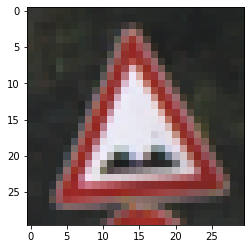

In [65]:
plt.imshow(plot)
plt.show()

In [67]:
def traffic_signal_recognition(path):
    plot, prediction = test_on_img(path)
    print("Predicted traffic sign is: ", classes_labeled[prediction])
    plt.imshow(plot)
    plt.show()

Predicted traffic sign is:  Speed limit (60km/h)


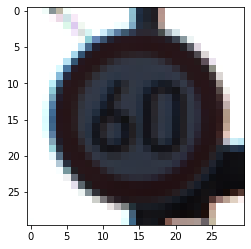

In [71]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00700.png')

Predicted traffic sign is:  Speed limit (70km/h)


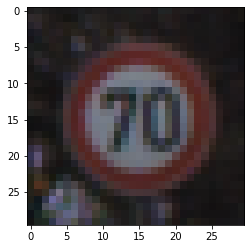

In [72]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00798.png')

Predicted traffic sign is:  Bumpy road


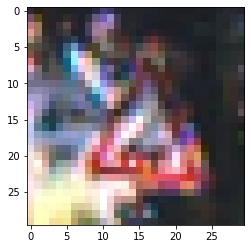

In [73]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00339.png')

Predicted traffic sign is:  Speed limit (100km/h)


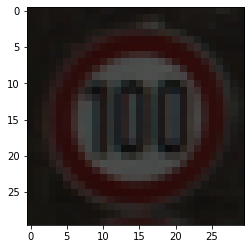

In [74]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00121.png')

Predicted traffic sign is:  No entry


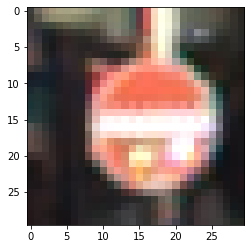

In [75]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00119.png')

Predicted traffic sign is:  No passing veh over 3.5 tons


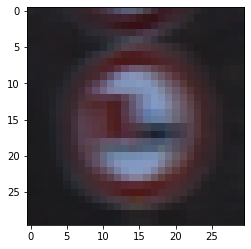

In [76]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00101.png')

Predicted traffic sign is:  Children crossing


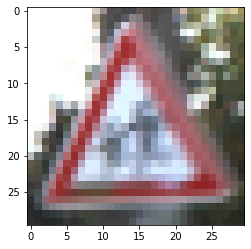

In [77]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\00255.png')

Predicted traffic sign is:  Turn right ahead


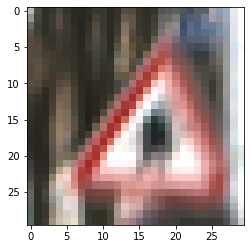

In [78]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\01284.png')

Predicted traffic sign is:  Stop


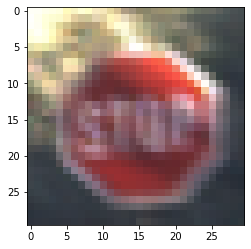

In [79]:
traffic_signal_recognition(r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 -\Traffic_Signs_WebApp-master\Test\01659.png')

 ----------------------------

# Transfer Learning

In [13]:
import xml.etree.ElementTree as ET
import os

In [31]:
os.listdir(r'ATTICA Dataset for Arabic Traffic Signs')

['part1_650_20_03_19_v8', 'part2_11200_20_03_19_v8']

#### part1_650_20_03_19_v8

In [30]:
path = "ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\voc_annotation_files\\"
out_panel = "ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\voc_annotation_panel\\"
out_sign = "ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\voc_annotation_sign\\"
out_invisible_line =  "ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\voc_annotation_invisible_line\\"
out_visible_line =  "ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\voc_annotation_visible_line\\"
out_text = "ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\voc_annotation_text\\"

In [32]:
out_names = [out_panel,out_sign,out_invisible_line,out_visible_line,out_text]

In [33]:
for out in out_names:
    if not os.path.exists(out):
        os.makedirs(out)

In [34]:
keep_name = ["panel","sign","corrupted"]

In [35]:
data_paths = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

In [37]:
data_paths[:10]

['0.xml',
 '1.xml',
 '10.xml',
 '100.xml',
 '101.xml',
 '102.xml',
 '103.xml',
 '104.xml',
 '105.xml',
 '106.xml']

In [38]:
len(data_paths)

664

In [68]:
images_files = []
images_labels = []

for file in data_paths:
    root = ET.parse(path+file).getroot()
    iterator = root.getiterator("object")

    images_files.append(file)
    
    labels_tmp = []
    i = 0
    for item in iterator:
        if i < 5:
            obj = item.find("name")
            labels_tmp.append(obj.text)
            i = i+1
        else:
            break
        
    images_labels.append(' '.join(labels_tmp))
        
#         if (obj.text not in keep_name ):
#             obj.text = "text_line"

#     tree = ET.ElementTree(root)
#     tree.write(path+out+file)

In [69]:
print(len(images_files), len(images_labels))

664 664


In [70]:
images_files[0]

'0.xml'

In [71]:
images_labels[0]

'خريبڭة ملال م بني 2000'

In [86]:
images_path = r'D:\Study Pack\Master DSBD\M2 S3\Deep Learning\TP\TP 4 - Traffic Signs WebApp master\Traffic_Signs_WebApp-master\ATTICA Dataset for Arabic Traffic Signs\part1_650_20_03_19_v8'

In [89]:
os.listdir(images_path)[0]

'0.jpg'

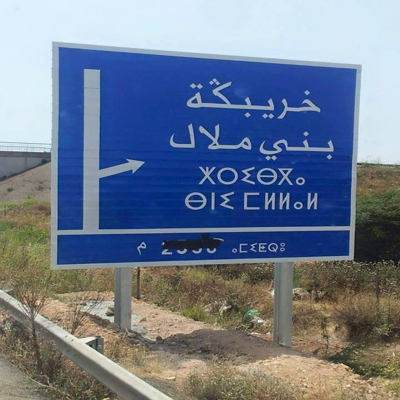

In [93]:
Image.open(images_path+'\\0.jpg').resize((400, 400))

In [92]:
images_labels[0]

'خريبڭة ملال م بني 2000'

## Construire la nouvelle Dataset

In [103]:
import glob
glob.glob(os.path.join(os.path.dirname(images_path), "*/*.jpg"))

['D:\\Study Pack\\Master DSBD\\M2 S3\\Deep Learning\\TP\\TP 4 - Traffic Signs WebApp master\\Traffic_Signs_WebApp-master\\ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\0.jpg',
 'D:\\Study Pack\\Master DSBD\\M2 S3\\Deep Learning\\TP\\TP 4 - Traffic Signs WebApp master\\Traffic_Signs_WebApp-master\\ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\1.jpg',
 'D:\\Study Pack\\Master DSBD\\M2 S3\\Deep Learning\\TP\\TP 4 - Traffic Signs WebApp master\\Traffic_Signs_WebApp-master\\ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\10.jpg',
 'D:\\Study Pack\\Master DSBD\\M2 S3\\Deep Learning\\TP\\TP 4 - Traffic Signs WebApp master\\Traffic_Signs_WebApp-master\\ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\100.jpg',
 'D:\\Study Pack\\Master DSBD\\M2 S3\\Deep Learning\\TP\\TP 4 - Traffic Signs WebApp master\\Traffic_Signs_WebApp-master\\ATTICA Dataset for Arabic Traffic Signs\\part1_650_20_03_19_v8\\102.jpg',
 'D:\\Study Pack\\Master 

In [104]:
new_images_path = glob.glob(os.path.join(os.path.dirname(images_path), "*/*.jpg"))

In [127]:
os.path.dirname(images_path)

'D:\\Study Pack\\Master DSBD\\M2 S3\\Deep Learning\\TP\\TP 4 - Traffic Signs WebApp master\\Traffic_Signs_WebApp-master\\ATTICA Dataset for Arabic Traffic Signs'

In [145]:
new_data = []
new_labels = []

In [146]:
for image_path in new_images_path:
    image = Image.open(image_path)
    image = np.array(image.resize((30,30)))
    new_data.append(image)
    img = image_path.replace(os.path.dirname(images_path)+"\part1_650_20_03_19_v8\\", '').split('.')[0]
    img = img.replace(os.path.dirname(images_path)+"\part2_11200_20_03_19_v8\\", '').split('.')[0]
    new_labels.append(img)

In [147]:
new_data = np.array(new_data)
new_labels = np.array(new_labels)
print(new_data.shape, new_labels.shape)

(1182, 30, 30, 3) (1182,)


In [149]:
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [150]:
len(new_labels)

1182

In [151]:
new_labels

array(['0', '1', '10', ..., '996', '998', '999'], dtype='<U4')

In [157]:
new_labels = [int(x) for x in new_labels]

In [159]:
len(new_labels)

1182

In [160]:
np.array(new_labels)

array([  0,   1,  10, ..., 996, 998, 999])

In [161]:
np.array(new_labels).shape

(1182,)

In [164]:
np.array(new_labels).max()

1413

In [167]:
print(new_labels.shape)

(1182, 1414)


append to the old dictionnary the newest data

In [171]:
len(images_labels)

664

In [176]:
imgs = [image_file.split('.')[0] for image_file in images_files]

In [178]:
imgs[:10]

['0', '1', '10', '100', '101', '102', '103', '104', '105', '106']

In [182]:
imgs = [int(x) for x in imgs]

In [192]:
imgs[:10]

[0, 1, 10, 100, 101, 102, 103, 104, 105, 106]

In [183]:
len(imgs)

664

In [223]:
X = []
y = []

all_images_file_name = os.listdir("./ATTICA Dataset for Arabic Traffic Signs/part1_650_20_03_19_v8")

for i in zip(new_data, new_labels):
    if np.argmax(i[1]) in imgs:
        if str(np.argmax(i[1]))+'.jpg' in all_images_file_name:
            X.append(str(np.argmax(i[1]))+'.jpg')
            y.append(new_labels[np.argmax(i[1])])
            
            


IndexError: index 1400 is out of bounds for axis 0 with size 1182